## pyCELP Contribution functions (recreates Schad & Dima (2020) Figure 2) 

 - written by Tom Schad 

In [1]:
import numpy as np
import pycelp
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rkbgym')
mpl.rcParams.update({
    "font.size":14,        
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

We first load reference data generated using the IDL version of Chianti Version 9. This was created using the genChiantiData.pro script, also available in this directory. 

In [2]:
savname = './chianti_temp_contfnc_data.sav'  # ,logt,ch_int,ions,wvl,dens,rht
idls = readsav(savname)
logt = idls['logt']
ch_int = np.copy(idls['ch_int']) ## units are  INT_UNITS   STRING   'photons cm-2 sr-1 s-1'
ions = idls['ions']
wvl  = idls['wvl']
dens = idls['dens']
rht  = idls['rht']
## remove bad low point
ch_int[:,0] = 1.e-35

Now we initialize all ions for the figure. Schad & Dima (2020) includes all levels for each ion.  This makes the calculations take considerable longer.  For demonstration purposes, we limit the number of levels to 100 max, which still make for very good comparison to the full calculation. 

In [3]:
fe14 = pycelp.Ion('fe_14',nlevels = 100) 
fe13 = pycelp.Ion('fe_13',nlevels = 100)
fe11 = pycelp.Ion('fe_11',nlevels = 100)
si10 = pycelp.Ion('si_10',nlevels = 100)   
si9 = pycelp.Ion('si_9')  ## largest Si 9 model available is 46 levels 

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

In [4]:
print(fe14,fe11,fe13,si10,si9)

pyCELP Ion class
    ---------------------
    Ion Name: fe_14
    Number of energy levels included: 100
    Number of SEE equations: 260
    Number of Radiative Transitions: 1817
    Ionization Equilbrium Filename: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq pyCELP Ion class
    ---------------------
    Ion Name: fe_11
    Number of energy levels included: 100
    Number of SEE equations: 318
    Number of Radiative Transitions: 1345
    Ionization Equilbrium Filename: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq pyCELP Ion class
    ---------------------
    Ion Name: fe_13
    Number of energy levels included: 100
    Number of SEE equations: 298
    Number of Radiative Transitions: 1198
    Ionization Equilbrium Filename: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq pyCELP Ion class
    ---------------------
    Ion Name: si_10
    Number of energy levels included: 100
    Number of SEE equations: 220
    Number of Radiative Transitions: 144

In [5]:
## set up 
temps = 10.**logt
pycelp_int = np.zeros((6,len(temps)))
edens = idls['dens']
rphot = rht-1.
thetab = np.rad2deg(np.arccos(1./np.sqrt(3.)))  ## Van Vleck
print(' Electron density, height, and thetaB: ')
print(edens,rphot,thetab)

 Electron density, height, and thetaB: 
316227780.0 0.10000002384185791 54.735610317245346


In [6]:
## do the calculations 
for n,t in enumerate(temps):
    print(n,' of ',len(temps)-1, ' temperatures')
    fe14.calc_rho_sym(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    fe11.calc_rho_sym(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    fe13.calc_rho_sym(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    si10.calc_rho_sym(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    si9.calc_rho_sym(edens,t,rphot,thetab,include_limbdark = False,include_protons = True)
    pycelp_int[0,n] = fe14.calc_Iemiss(5303)
    pycelp_int[1,n] = fe11.calc_Iemiss(7892)
    pycelp_int[2,n] = fe13.calc_Iemiss(10746)
    pycelp_int[3,n] = fe13.calc_Iemiss(10798)
    pycelp_int[4,n] = si10.calc_Iemiss(14301)
    pycelp_int[5,n] = si9.calc_Iemiss(39343)

0  of  60  temperatures
1  of  60  temperatures
2  of  60  temperatures
3  of  60  temperatures
4  of  60  temperatures
5  of  60  temperatures
6  of  60  temperatures
7  of  60  temperatures
8  of  60  temperatures
9  of  60  temperatures
10  of  60  temperatures
11  of  60  temperatures
12  of  60  temperatures
13  of  60  temperatures
14  of  60  temperatures
15  of  60  temperatures
16  of  60  temperatures
17  of  60  temperatures
18  of  60  temperatures
19  of  60  temperatures
20  of  60  temperatures
21  of  60  temperatures
22  of  60  temperatures
23  of  60  temperatures
24  of  60  temperatures
25  of  60  temperatures
26  of  60  temperatures
27  of  60  temperatures
28  of  60  temperatures
29  of  60  temperatures
30  of  60  temperatures
31  of  60  temperatures
32  of  60  temperatures
33  of  60  temperatures
34  of  60  temperatures
35  of  60  temperatures
36  of  60  temperatures
37  of  60  temperatures
38  of  60  temperatures
39  of  60  temperatures
40  of  60

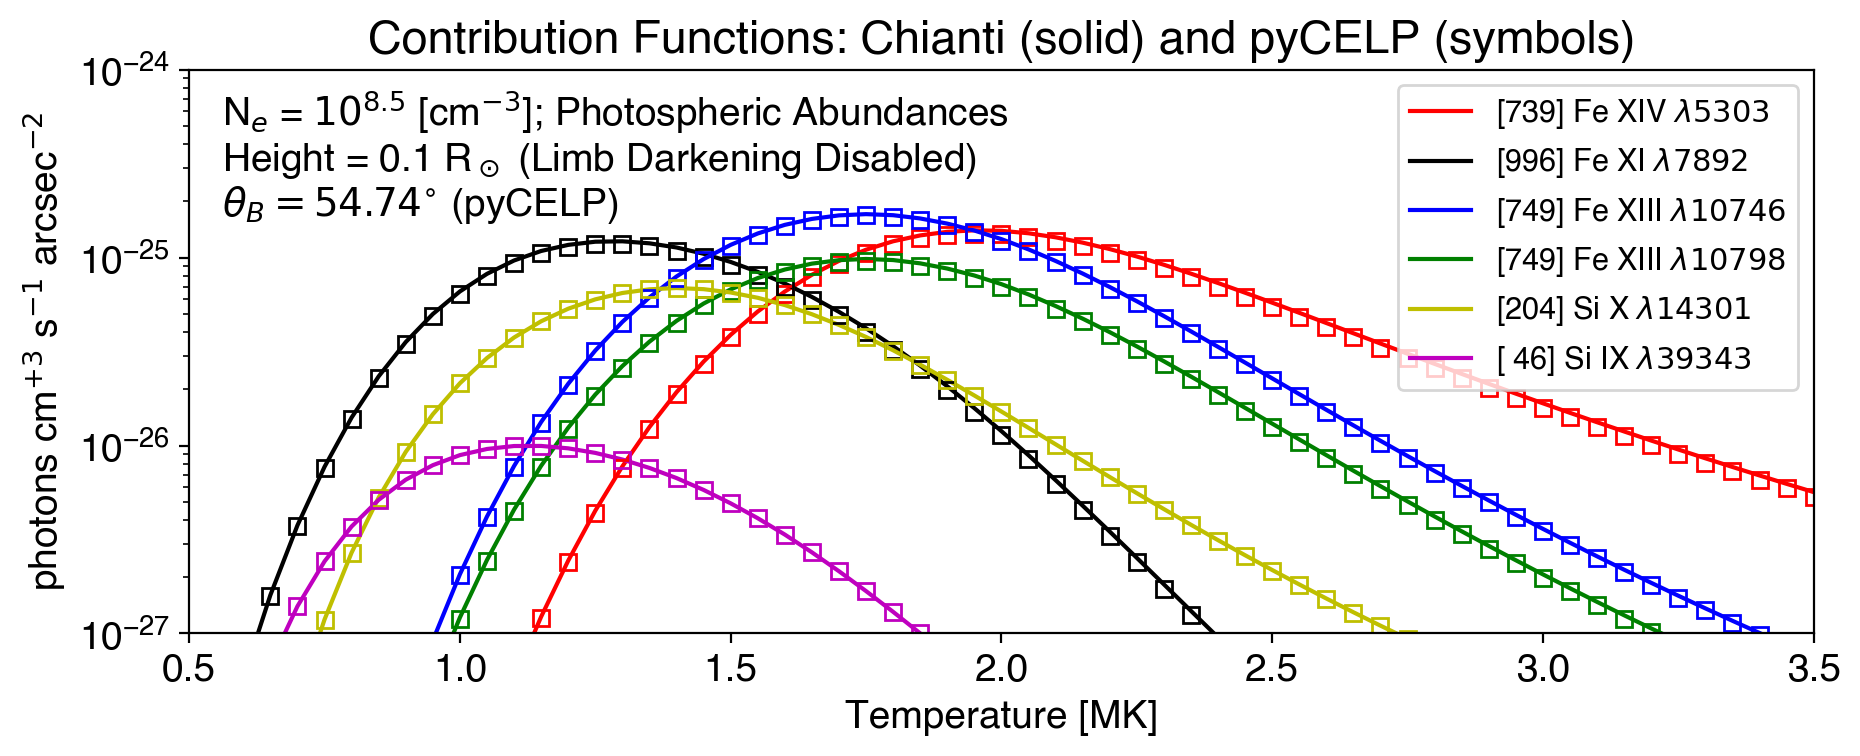

In [7]:
##plotting 
width, height = plt.figaspect(0.42)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(width,height), dpi=200)

labs = [r'[739] Fe XIV $\lambda5303$',
        r'[996] Fe XI $\lambda7892$',
        r'[749] Fe XIII $\lambda10746$',
        r'[749] Fe XIII $\lambda10798$',
        r'[204] Si X $\lambda14301$',
        r'[ 46] Si IX $\lambda39343$']
sr2arcsec = (180./np.pi)**2.*3600.**2.

for zz in range(0,len(wvl)):
    ax.plot((10.**logt)/1.e6,ch_int[zz,:]/sr2arcsec,label = labs[zz])
for n in range(6):
    ax.plot(temps/1e6,pycelp_int[n,:]/edens/(0.85*edens),'s',fillstyle = 'none')

ax.set_xlim(0.5,3.5)
ax.set_yscale('log')
ax.set_ylim(1.e-27,1.e-24)
ax.set_ylabel(r'photons cm$^{+3}$ s$^{-1}$ arcsec$^{-2}$')
ax.set_xlabel('Temperature [MK]')
ax.text(0.02,0.9,r'N$_{e}$ = $10^{8.5}$ [cm$^{-3}$]; Photospheric Abundances',transform = ax.transAxes)
ax.text(0.02,0.82,r'Height = 0.1 R$_\odot$ (Limb Darkening Disabled)',transform = ax.transAxes)
ax.text(0.02,0.74,r'$\theta_{B} = 54.74^{\circ}$ (pyCELP)',transform = ax.transAxes)
ax.set_title('Contribution Functions: Chianti (solid) and pyCELP (symbols)')
ax.legend(fontsize = 11)
fig.tight_layout()
